# Penguins Blog

## Introduction

##### In this blog post, I will be working with the "Penguins dataset." This dataset is a mix of quantitative and qualitative features and relates to various penguin species. The goal of this assignment is to ultimately create a model which can accurately predict a penguin's species based on the rest of the features. Before this step, I will perform a series of preprocessing techniques. I will begin with data wrangling, visualization, exploratory data analysis, and then move on to data preparation and feature selection.

## Part 1: Data wrangling

##### In this first part of this blog, we will import the dataset and perform exploratory data analysis, visualize the data, and prepare it for further modeling.

### Import the training data set.

##### We will split our data into training and testing components in order to avoid overfitting. By using a train/test split, we can train our various models on the train data and analyze performance using the test data. It is IMPERATIVE that the model does not see the test data until the very end. 

In [2]:
import pandas as pd
import numpy as np

train_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

Once we have the training dataset stored in a Pandas dataframe, we can view the shape and first few rows using the built in head() function:

In [3]:
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,27,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N46A1,Yes,11/29/07,44.5,14.3,216.0,4100.0,NaN,7.96621,-25.69327,NaN
1,PAL0708,22,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N41A2,Yes,11/27/07,45.1,14.5,215.0,5000.0,FEMALE,7.63220,-25.46569,NaN
2,PAL0910,124,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N67A2,Yes,11/16/09,41.4,18.5,202.0,3875.0,MALE,9.59462,-25.42621,NaN
3,PAL0910,146,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N82A2,Yes,11/16/09,39.0,18.7,185.0,3650.0,MALE,9.22033,-26.03442,NaN
4,PAL0708,24,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N85A2,No,11/28/07,50.6,19.4,193.0,3800.0,MALE,9.28153,-24.97134,NaN


##### Some things to notice off the bat:  
1. There are a lot of features. For our modeling section, we will probably want to narrow these down.
2. There are a mix of qualitative and quantitative features.
3. The species feature will be our target variable. That is, we will attempt to use the other features to predict the species of each penguin.  
4. There is some NaN or incomplete data. We will want to either impute or remove these instances

#### Shorten Names of Species for visualization

In our training dataset, you will notice that our target feature, species, has very long winded names for the various species of penguins. To simplify this (which will be useful when visualizing these names), we will use the pandas "replace" method to shorten the names:

In [4]:
# Replace species for easier visualization

train = train.replace({"Gentoo penguin (Pygoscelis papua)":"Gentoo", 
                       "Adelie Penguin (Pygoscelis adeliae)":"Adelie", 
                       "Chinstrap penguin (Pygoscelis antarctica)": "Chinstrap"})

#### Drop comments column

Additionally, let's drop the comments feature. Not only is it NaN primarily, but it also will not be useful in our model. To perform this task, we can use the drop() method in the pandas framework.

In [5]:
train = train.drop("Comments", axis = 1)

#### Next, let's examine the entries in our Region column:

In [6]:
train["Region"].unique()

array(['Anvers'], dtype=object)

Because there is only one unique value in this column, it will not help us in our analysis. Therefore, we can drop this column as well:

In [7]:
train = train.drop("Region", axis = 1)

#### Now, let's view our updated dataset

In [8]:
train.head()

,studyName,Sample Number,Species,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,27,Gentoo,Biscoe,"Adult, 1 Egg Stage",N46A1,Yes,11/29/07,44.5,14.3,216.0,4100.0,NaN,7.96621,-25.69327
1,PAL0708,22,Gentoo,Biscoe,"Adult, 1 Egg Stage",N41A2,Yes,11/27/07,45.1,14.5,215.0,5000.0,FEMALE,7.63220,-25.46569
2,PAL0910,124,Adelie,Torgersen,"Adult, 1 Egg Stage",N67A2,Yes,11/16/09,41.4,18.5,202.0,3875.0,MALE,9.59462,-25.42621
3,PAL0910,146,Adelie,Dream,"Adult, 1 Egg Stage",N82A2,Yes,11/16/09,39.0,18.7,185.0,3650.0,MALE,9.22033,-26.03442
4,PAL0708,24,Chinstrap,Dream,"Adult, 1 Egg Stage",N85A2,No,11/28/07,50.6,19.4,193.0,3800.0,MALE,9.28153,-24.97134


## Part 2: Visualization

##### In the next part of our blog, we will do some exploratory visualizations to better understand our dataset. Visualizations can help us find trends, understand patterns, and often times lead to interesting research questions.

First, let's import the seaborn package which is used for visualization.

In [9]:
# Import seaborn lib for data viz

import seaborn as sns

First, let's do a simple scatterplot which shows body mass vs flipper length. We will set the 'hue' parameter to "Species" to analyze the difference between penguin species.

<Axes: xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

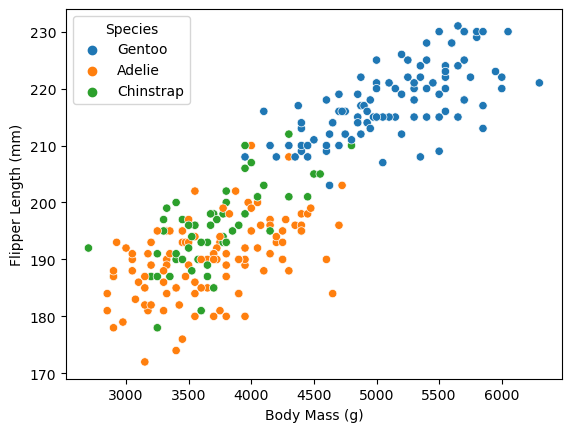

In [10]:
# Visualize data

sns.scatterplot(data=train, x="Body Mass (g)", y="Flipper Length (mm)", hue="Species")

From this plot, we can see that Gentoo penguins are generally larger and heavier than the other two species. On the other hand, Adelie and Chinstrap penguins are typically around the same size as each other. Now, let's output the same graph, but instead of separating by species, let's separate by sex.

<Axes: xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

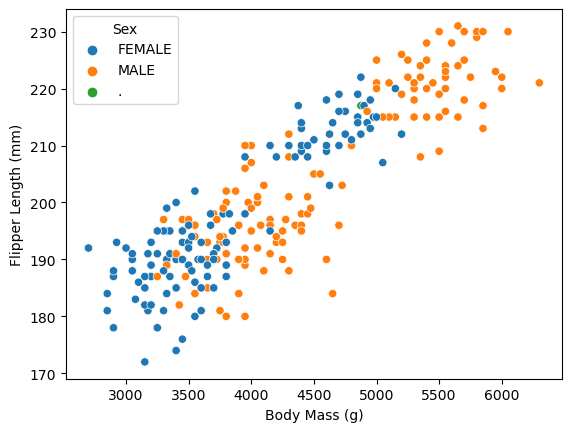

In [11]:
sns.scatterplot(data=train, x="Body Mass (g)", y="Flipper Length (mm)", hue="Sex")

From this graph, we can sort of make out two clusters of points. This could represent baby vs full grown penguins. In each of the clusters, the male penguins are larger and heavier than the corresponding female counterpart. It is important to note that this graph does not give a full understanding. More specifically, we could try to adjust for age/species to get a better picture. However, for our purposes, this will be sufficient for now.

#### Let's examine which species live on each island:

This visualization will give us a better geographical understanding of our penguins, which could affect some other attributes. For this plot, we will use the groupby() and size() methods to count an aggregate number of penguins on each island. Here is the result:

In [12]:
species_df = train.groupby(['Island', 'Species']).size().reset_index(name='count')
species_df

,Island,Species,count
0,Biscoe,Adelie,35
1,Biscoe,Gentoo,101
2,Dream,Adelie,41
3,Dream,Chinstrap,56
4,Torgersen,Adelie,42


##### Let's further visualize this relationship with a bar graph:

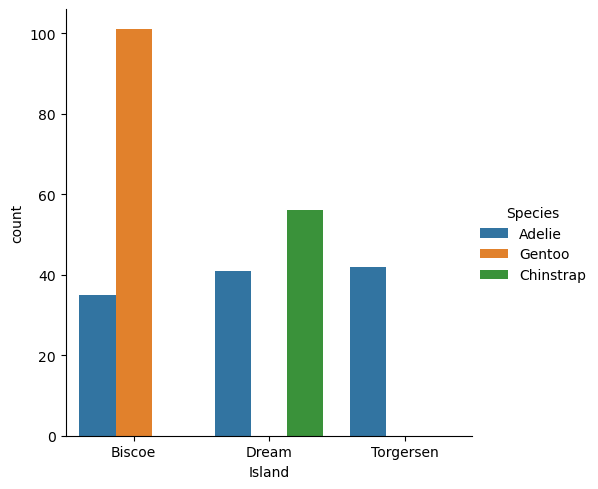

In [13]:
sns.catplot(x="Island", y="count", hue="Species", data=species_df, kind="bar")

From this, we can see that Adelie penguins are present on every island (and the only ones on Torgersen), while Gentoo are located on Biscoe, and Chinstrap are located on Dream Island.

## Part 3: Modeling

##### Next, we will model our data. The first part of this process will be preparing it using various preprocessing techniques. Then, we will implement a feature selection process to narrow down which features will be beneficial for our model. Finally, we will train multiple classification models on our training data and test them on our test data. The goal of this section is to find a model and subset of our data which can 100% accurately predict the species of our test data.

#### Data Preparation

First, we need to prepare our data to be modeled. This function performs the following tasks:  
1. Take in a pandas df as the argument.  
2. Drop some columns that are irrelevant to species prediction.  
3. Drop all na values  
4. Uses label encoding to change our species variable into quantitative values (0, 1, 2). Remember that models only  work well with quantitative data, so this step is necessary. This will be our y_train value.  
5. Drop the target feature from our training dataset.  
6. Make dummy variables for the remainder of the dataset (for qualitative variables).  
7. This function will output our X_train and y_train values.  

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

##### Now, let's take a look at our updated dataset

In [15]:
X_train

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
1,45.1,14.5,215.0,5000.0,7.63220,-25.46569,1,0,0,1,0,1,1,0
2,41.4,18.5,202.0,3875.0,9.59462,-25.42621,0,0,1,1,0,1,0,1
3,39.0,18.7,185.0,3650.0,9.22033,-26.03442,0,1,0,1,0,1,0,1
4,50.6,19.4,193.0,3800.0,9.28153,-24.97134,0,1,0,1,1,0,0,1
5,33.1,16.1,178.0,2900.0,9.04218,-26.15775,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,41.1,17.5,190.0,3900.0,8.94365,-26.06943,0,1,0,1,0,1,0,1
270,45.4,14.6,211.0,4800.0,8.24515,-25.46782,1,0,0,1,0,1,1,0
271,36.2,17.2,187.0,3150.0,9.04296,-26.19444,0,0,1,1,1,0,1,0
272,50.0,15.9,224.0,5350.0,8.20042,-26.39677,1,0,0,1,0,1,0,1


We have used one-hot encoding to transform our qualitative features into quantitative. This dataset is now ready for feature selection.

### Feature Selection

In this part of our blog, we will perform feature selection to narrow down which features will be incorporated into our finalized model. There is a trade off with how many features to use. If you use too many, your model may be prone to being skewed, or it might be unable to find the underlying value due to excess noise. On the other hand, if you only use 1-2 features, your model may not have enough information to accurately predict. For our project, we will use 3 features: 2 quantitative and 1 qualitative. Because we used one-hot encoding, reminder that our finalized dataset will be 4 columns long, as the qualitative features are each 2 columns.

To perform feature selection, we will rely on a brute force method of looping through all our remaining features and fitting models on each of sub-sets of data. We will fit four models: polynomial logistic regression, SVM, decision tree, and random forest. For each model, we will do the following: 

1. Loop through different hyperparameter values in order to optimize the algorithm. For each model, perform cross validation to analyze model performance.
2. Create an instance of the model and enter the optimal parameters.
3. Fit the model to the data.
4. Get the score of the model

We will store each score of the 4 models (LR, SVM, tree, forest) in an array and return the top model. Here is the implementation of finding the best model:

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Helper function for LR
def poly_LR(deg):
  return Pipeline([("poly", PolynomialFeatures(degree = deg)),
                   ("LR", LogisticRegression(max_iter = 5000))])


def getModel(X_new):
    
    # Keep track of model scores

    model_scores = []
    
    # Logistic Regression

    LR_cv = []

    for deg in range(1, 4):
        plr = poly_LR(deg = deg)
        cv_scores_LR = cross_val_score(plr, X_new, y_train, cv=5)
        LR_cv.append(np.mean(cv_scores_LR))
    
    optimal_degree = np.argmax(LR_cv) + 1
    plr = poly_LR(deg=optimal_degree)
    plr.fit(X_new, y_train)
    LR_score = plr.score(X_new, y_train)

    # Append to model scores
    model_scores.append(LR_score)

    # SVM

    # Use Cross validation to get optimal gamma

    gamma_vals = [.0001, .001, .01, .1, 1, 2, 5, 10, 50]
    svm_cv = []

    for gam in gamma_vals:

        s = svm.SVC(gamma=gam)
        cv_scores_SVM = cross_val_score(s, X_new, y_train, cv=5)
        svm_cv.append(np.mean(cv_scores_SVM))

    # Get top depth and fit on entire training
    optimal_gamma = gamma_vals[np.argmax(svm_cv)]
    s = svm.SVC(gamma=optimal_gamma)
    s.fit(X_new, y_train)
    svm_score = s.score(X_new, y_train)
    
    # Append to model scores
    model_scores.append(svm_score)

    # Decision tree

    # Use cross validation to get max depth

    tree_cv = []

    for depth in range(1, 6):

        t = tree.DecisionTreeClassifier(max_depth=depth)
        cv_scores_tree = cross_val_score(t, X_new, y_train, cv=5)
        tree_cv.append(np.mean(cv_scores_tree))

    # Get top depth and fit on entire training
    optimal_depth = np.argmax(tree_cv) + 1
    t = tree.DecisionTreeClassifier(max_depth=optimal_depth)
    t.fit(X_new, y_train)
    tree_score = t.score(X_new, y_train)
   
    # Append to model scores
    model_scores.append(tree_score)
    

    # Random forest

    rf_cv = []

    for depth in range(1, 6):

        rf = RandomForestClassifier(n_estimators=100, max_depth=depth)
        cv_scores_rf = cross_val_score(rf, X_new, y_train, cv=5)
        rf_cv.append(np.mean(cv_scores_rf))

    # Get top depth and fit on entire training
    optimal_depth = np.argmax(rf_cv) + 1
    rf = RandomForestClassifier(n_estimators=100, max_depth=optimal_depth)
    rf.fit(X_new, y_train)
    rf_score = rf.score(X_new, y_train)

    # Append to model scores
    model_scores.append(rf_score)

    # Models to return:
        # T
        # S
        # PLR
        # Rf

    # Return best model out of the four

    if max(model_scores) == model_scores[0]:
        return plr
    elif max(model_scores) == model_scores[1]:
        return s
    elif max(model_scores) == model_scores[2]:
        return t
    else:
        return rf

##### Preparing our test data

After finding the best model for a specific sub-set of our data, we will see how that model does on unseen test data. To prepare the test data, we will follow the same process as the training data. First, we will make a pandas dataframe using the given URL. Next, we will replace drop the same rows and change the name of our species. Finally, we will employ our pre-written "prepare_data()" function to get our X_test and y_test values.

In [17]:
test_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

test = test.replace({"Gentoo penguin (Pygoscelis papua)":"Gentoo", 
                       "Adelie Penguin (Pygoscelis adeliae)":"Adelie", 
                       "Chinstrap penguin (Pygoscelis antarctica)": "Chinstrap"})

test = test.drop("Comments", axis = 1)
test = test.drop("Region", axis = 1)


X_test, y_test = prepare_data(test)
X_test.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,45.6,20.3,191.0,4600.0,8.65466,-26.32909,1,0,0,1,0,1,0,1
1,44.4,17.3,219.0,5250.0,8.13746,-26.79093,1,0,0,1,0,1,0,1
2,45.8,14.6,210.0,4200.0,7.79958,-25.62618,1,0,0,1,0,1,1,0
3,47.5,16.8,199.0,3900.0,9.07825,-25.14550,0,1,0,1,0,1,1,0
4,45.0,15.4,220.0,5050.0,8.63488,-26.75621,1,0,0,1,0,1,0,1


#### Check all features

Here is the brute force implementation of our feature selection. In this function, which I have named "go," we will perform the following tasks:  

1. Keep list of all quant and qual columns to check
2. for each qual column:
    1. Loop through every possible pair of quant columns
    2. With these three columns, which make up our sub-set:
        1. Make new dataset with just these columns
        2. Get the best model using the above implementation
        3. calculate test score of model on test data
        4. If we hit 100% accuracy, we are done! Return the model, X, and cols

In [22]:
from itertools import combinations


def go():
  all_qual_cols = ["Clutch Completion", "Sex", "Island", "Clutch Completion"]
  all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

  for qual in all_qual_cols: 
    qual_cols = [col for col in X_train.columns if qual in col ]
    for pair in combinations(all_quant_cols, 2):
      cols = list(pair) + qual_cols
      # Get sub dataset
      X_new = X_train.loc[:, cols]
      # For each model, 
      # Fit model on X_new
      model = getModel(X_new)

      # Now test model on test data

      test_score = model.score(X_test.loc[:, cols], y_test)
      
      if test_score == 1.0:
        print("100% testing accuracy\nFeatures: " + str(pair) + str(qual))
        print(model)
        return model, X_new, cols
      
model, X, cols = go()
    

/Users/johnnykantaros/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/johnnykantaros/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

100% testing accuracy
Features: ('Culmen Length (mm)', 'Flipper Length (mm)')Sex
RandomForestClassifier(max_depth=5)


Successful! After running our go() function, it eventually returns a subset and model with 100% testing accuracy. Here is the result:

##### Model

In [23]:
model

RandomForestClassifier(max_depth=5)

Our optimal model is a random forest classifier with a maximum depth of 5.

##### Features

In [24]:
cols

['Culmen Length (mm)', 'Flipper Length (mm)', 'Sex_FEMALE', 'Sex_MALE']

Our feature selection process left us 3 features: 'Culmen Length (mm)', 'Flipper Length (mm)', and 'Sex'

### Plotting Decision Regions

Finally, let's visualize our decision regions:

In [19]:
from matplotlib import pyplot as plt
import numpy as np

In [20]:
from matplotlib.patches import Patch

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()

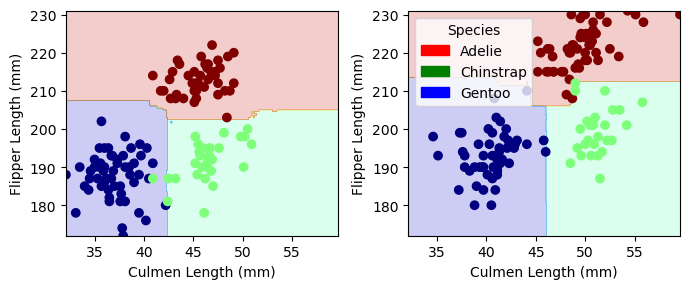

In [21]:
plot_regions(model, X, y)

## Hope you enjoyed this blog!